# 读取csv文件中内容

In [1]:
import pandas as pd

In [7]:
data = pd.read_csv('./data/stock_day.csv')
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)
# drop方法, 默认是按行删除的, axis: 0 表示按行删除, 1 表示按列删除. 
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


# DataFrame的切片, 索引

In [9]:
# 通过索引名称直接获取, 先列后行
data['open']['2018-02-27']

23.53

In [11]:
data['open']['2018-02-27':'2018-02-23']

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
Name: open, dtype: float64

In [107]:
# 使用数值索引, 先行后列
data.iloc[1,1]
data.iloc[:2, 2:4]

,close,low
2015-03-02,2,12.20
2015-03-03,2,12.52


In [16]:
# 使用名称索引, 先行后列
data.loc['2018-02-27', 'low']
data.loc['2018-02-27':'2018-02-22', 'open':'low']

,open,high,close,low
2018-02-27,23.53,25.88,24.16,23.53
2018-02-26,22.80,23.78,23.53,22.80
2018-02-23,22.88,23.37,22.82,22.71
2018-02-22,22.25,22.76,22.28,22.02


In [20]:
# 名称和数字索引混合使用
# data.ix[1, 'open']
# data.ix['2018-02-27', 2]
data.ix[:3, 'open':'close']

/Users/itheima/Envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,open,high,close
2018-02-27,23.53,25.88,24.16
2018-02-26,22.80,23.78,23.53
2018-02-23,22.88,23.37,22.82


In [22]:
# 推荐使用loc和iloc来获取的方式
# data.loc[data.index[0:4], ['open', 'close', 'high', 'low']]
data.iloc[0:4, data.columns.get_indexer(['open', 'close', 'high', 'low'])]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


# 赋值

In [23]:
data['close'] = 1

In [25]:
data.close = 2

In [32]:
# 添加新列的时候, 需要使用该方式.
data['xx'] = 10
data.head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2018-02-27,23.53,25.88,2,23.53,95578.03,0.63,2.68,2.39,10
2018-02-26,22.80,23.78,2,22.80,60985.11,0.69,3.02,1.53,10
2018-02-23,22.88,23.37,2,22.71,52914.01,0.54,2.42,1.32,10
2018-02-22,22.25,22.76,2,22.02,36105.01,0.36,1.64,0.90,10
2018-02-14,21.49,21.99,2,21.48,23331.04,0.44,2.05,0.58,10


# 排序

## 按值排序

In [37]:
# 按照涨跌幅大小进行排序 , 使用ascending指定按照大小排序
data.sort_values(by='p_change', ascending=False)

# 首先 涨跌幅, trunover 排序 
data.sort_values(by=['p_change', 'turnover'], ascending=False).head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2015-08-28,15.40,16.46,2,15.00,117827.60,1.50,10.03,4.03,10
2015-05-21,27.50,28.22,2,26.50,121190.11,2.57,10.02,4.15,10
2016-12-22,18.50,20.42,2,18.45,150470.83,1.86,10.02,3.77,10
2015-08-04,16.20,17.35,2,15.80,94292.63,1.58,10.02,3.23,10
2016-07-07,18.66,18.66,2,18.41,48756.55,1.70,10.02,1.67,10


## 按索引排序

In [40]:
# data.sort_index()
data.sort_index(ascending=False).head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2018-02-27,23.53,25.88,2,23.53,95578.03,0.63,2.68,2.39,10
2018-02-26,22.80,23.78,2,22.80,60985.11,0.69,3.02,1.53,10
2018-02-23,22.88,23.37,2,22.71,52914.01,0.54,2.42,1.32,10
2018-02-22,22.25,22.76,2,22.02,36105.01,0.36,1.64,0.90,10
2018-02-14,21.49,21.99,2,21.48,23331.04,0.44,2.05,0.58,10


## Series 按值排序

In [46]:
data['p_change'].sort_values(ascending=False).head()

2015-08-28    10.03
2015-08-04    10.02
2015-05-21    10.02
2016-07-07    10.02
2016-12-22    10.02
Name: p_change, dtype: float64

## Series按索引排序


In [49]:
# data['p_change'].sort_index()
data['p_change'].sort_index(ascending=False).head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

# 算术运算

In [50]:
# +, -, * , /
data.head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2018-02-27,23.53,25.88,2,23.53,95578.03,0.63,2.68,2.39,10
2018-02-26,22.80,23.78,2,22.80,60985.11,0.69,3.02,1.53,10
2018-02-23,22.88,23.37,2,22.71,52914.01,0.54,2.42,1.32,10
2018-02-22,22.25,22.76,2,22.02,36105.01,0.36,1.64,0.90,10
2018-02-14,21.49,21.99,2,21.48,23331.04,0.44,2.05,0.58,10


In [61]:
# data['open'] + 1
# data['open'] - 1
# data['open'] * 2
# data['open'] / 2
# 推荐使用方法进行操作
data['open'].add(1)
data['open'].sub(1)
data['open'].mul(2)
data['open'].div(2).head()

2018-02-27    11.765
2018-02-26    11.400
2018-02-23    11.440
2018-02-22    11.125
2018-02-14    10.745
Name: open, dtype: float64

# 2 逻辑运算
## 2.1 逻辑运算符号<、 >、|、 &

In [67]:
data['p_change'] > 2
# 这里支持: 所有比较运算符

# 条件过滤: 获取涨幅大于2的股票数据
data[data['p_change'] > 2].head()

# 条件过滤: 获取涨幅大于2并且open>15的股票数据 
data[(data['p_change'] > 2) & (data['open'] > 15)].head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2018-02-27,23.53,25.88,2,23.53,95578.03,0.63,2.68,2.39,10
2018-02-26,22.80,23.78,2,22.80,60985.11,0.69,3.02,1.53,10
2018-02-23,22.88,23.37,2,22.71,52914.01,0.54,2.42,1.32,10
2018-02-14,21.49,21.99,2,21.48,23331.04,0.44,2.05,0.58,10
2018-02-12,20.70,21.40,2,20.63,32445.39,0.82,4.03,0.81,10


## 逻辑运算函数

In [69]:
data.query('p_change>10 & open > 15').head()

,open,high,close,low,volume,price_change,p_change,turnover,xx
2017-06-22,23.32,25.93,2,23.26,421673.59,2.36,10.01,10.55,10
2016-12-22,18.50,20.42,2,18.45,150470.83,1.86,10.02,3.77,10
2016-09-01,20.85,22.86,2,20.75,258577.98,2.08,10.01,8.85,10
2016-07-25,20.17,21.98,2,20.00,203564.47,2.00,10.01,6.97,10
2016-07-07,18.66,18.66,2,18.41,48756.55,1.70,10.02,1.67,10


In [71]:
data[data['turnover'].isin([1.67, 3.77])]

,open,high,close,low,volume,price_change,p_change,turnover,xx
2016-12-22,18.50,20.42,2,18.45,150470.83,1.86,10.02,3.77,10
2016-07-07,18.66,18.66,2,18.41,48756.55,1.70,10.02,1.67,10
2015-08-18,22.40,22.40,2,20.16,110214.14,-2.24,-10.00,3.77,10


# 统计函数

In [72]:
## 总统计函数
data.describe()

,open,high,close,low,volume,price_change,p_change,turnover,xx
count,643.000000,643.000000,643.0,643.000000,643.000000,643.000000,643.000000,643.000000,643.0
mean,21.272706,21.900513,2.0,20.771835,99905.519114,0.018802,0.190280,2.936190,10.0
std,3.930973,4.077578,0.0,3.791968,73879.119354,0.898476,4.079698,2.079375,0.0
min,12.250000,12.670000,2.0,12.200000,1158.120000,-3.520000,-10.030000,0.040000,10.0
25%,19.000000,19.500000,2.0,18.525000,48533.210000,-0.390000,-1.850000,1.360000,10.0
50%,21.440000,21.970000,2.0,20.980000,83175.930000,0.050000,0.260000,2.500000,10.0
75%,23.400000,24.065000,2.0,22.850000,127580.055000,0.455000,2.305000,3.915000,10.0
max,34.990000,36.350000,2.0,34.010000,501915.410000,3.030000,10.030000,12.560000,10.0


In [79]:
# 统计函数
# 方差
# data.var(axis=0)
# 中位数
# data.median()
# data.mode()
data['open'].mode()

0    20.85
1    21.30
2    24.10
dtype: float64

In [85]:
# 获取最大的索引值
data.idxmax()
# 获取小值的索引值
# data.idxmin(axis=1)
# 注意: 默认所有统计函数都是按列统计的, 也可以指定按行统计.

open            2015-06-15
high            2015-06-10
close           2018-02-27
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
turnover        2017-10-26
xx              2018-02-27
dtype: object

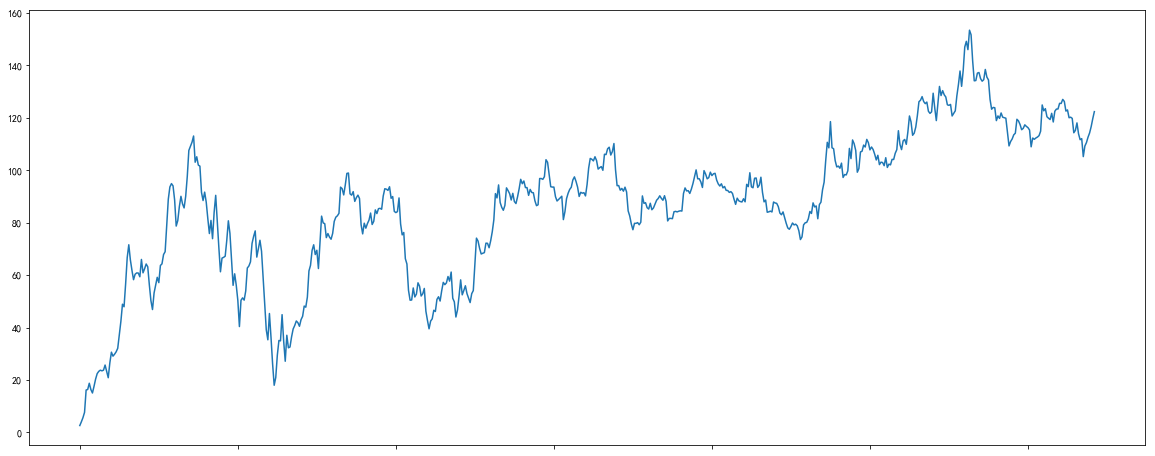

In [89]:
# 累计求和
# 1. 把数据按日期的升序排列
data = data.sort_index()
# data
# 2. 获取涨跌幅
stock_rise = data['p_change']
# 3. 对涨跌幅进行累计求和
s_r_cs = stock_rise.cumsum()
# 4. 绘制图(折线图)
s_r_cs.plot(figsize=(20, 8))

In [108]:
# 自定义统计
data[['open', 'close']].apply(lambda x: x.max() - x.min(), axis=0)
# type(data[['open']]) DataFrame
# type(data['open'])   Series

open     22.74
close     0.00
dtype: float64

In [116]:
# data[['open']]
# data.values

# Pandas绘图

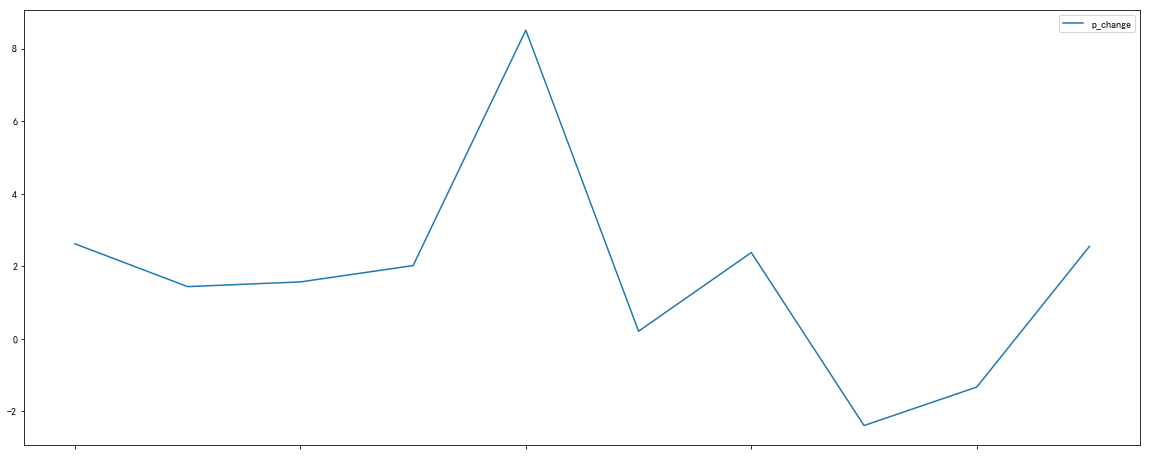

In [120]:
## 绘制折线图
data.iloc[:10].plot(y='p_change', figsize=(20, 8))

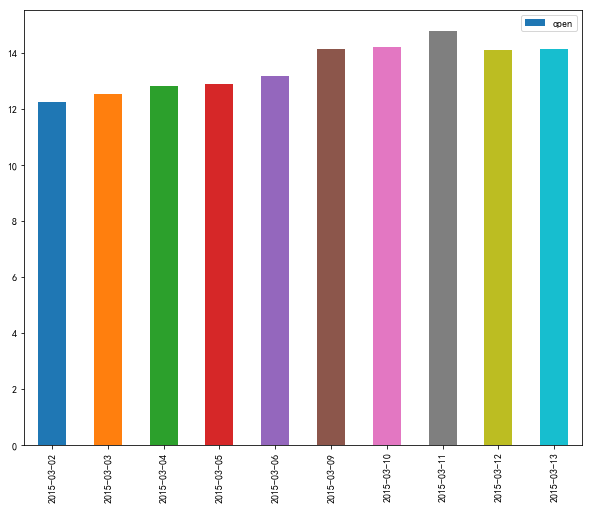

In [123]:
# 绘制柱状图(垂直)
data.iloc[:10].plot(y='open', kind='bar', figsize = (10, 8))

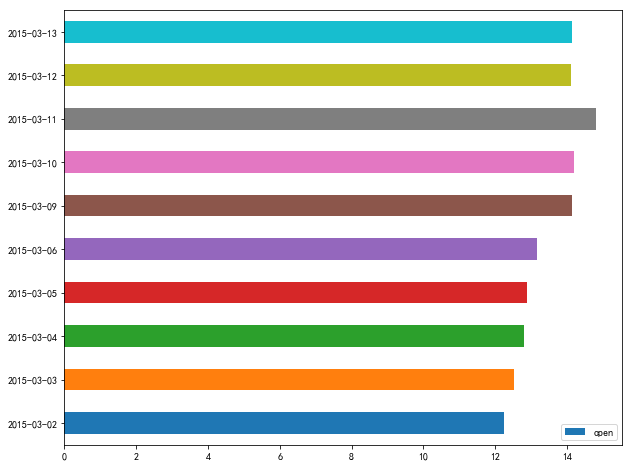

In [124]:
# 绘制柱状图(水平)
data.iloc[:10].plot(y='open', kind='barh', figsize = (10, 8))

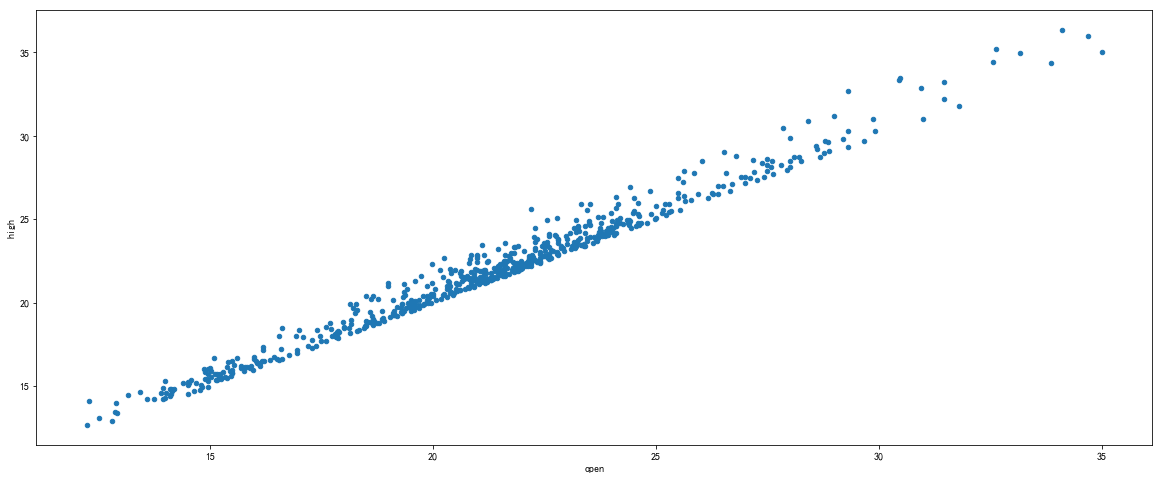

In [125]:
# 绘制散点图(开盘价和最高价的关系)
data.plot(x='open', y='high', kind='scatter', figsize=(20, 8))